In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [11]:
cancer=load_breast_cancer()
X,y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [5]:
svm=SVC()
svm.fit(X_train, y_train)

SVC()

In [7]:
y_pred=svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9766081871345029
Confusion Matrix:
 [[ 61   2]
 [  2 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [28]:
# GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf', 'poly']
}

grid = GridSearchCV(svm, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV Score: 0.9672784810126581


In [29]:
param_dist = {
    'C': np.logspace(-2, 2, 10),
    'gamma': np.logspace(-3, 1, 10),
    'kernel': ['rbf', 'poly']
}

random_search = RandomizedSearchCV(svm, param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

Best Parameters: {'kernel': 'rbf', 'gamma': np.float64(0.05994842503189409), 'C': np.float64(4.6415888336127775)}
Best CV Score: 0.9598101265822784


In [ ]:
# Use best model from GridSearch
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

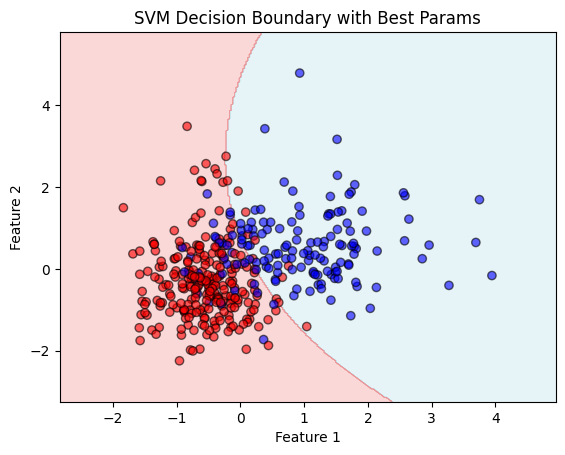

In [33]:
# Take the best model from GridSearchCV
best_svm = grid.best_estimator_

# Pick only 2 features for visualization
X_vis = X_train[:, :2]   # let's say first two features
y_vis = y_train

# Re-fit best SVM on just 2 features (for plotting)
best_svm.fit(X_vis, y_vis)

# Create a meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict over the grid
Z = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(("lightblue", "lightcoral")))
plt.scatter(X_vis[:, 0], X_vis[:, 1], alpha=0.6, c=y_vis, cmap=ListedColormap(("blue", "red")), edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary with Best Params")
plt.show()


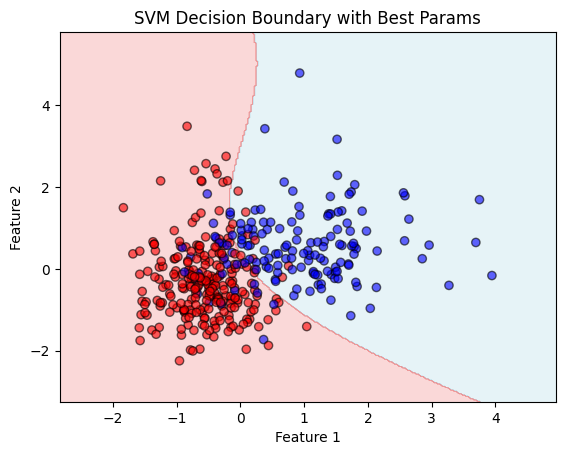

In [36]:
# Take the best model from RandomisedSearchCV
best_svm = random_search.best_estimator_

# Pick only 2 features for visualization
X_vis = X_train[:, :2]   # let's say first two features
y_vis = y_train

# Re-fit best SVM on just 2 features (for plotting)
best_svm.fit(X_vis, y_vis)

# Create a meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict over the grid
Z = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(("lightblue", "lightcoral")))
plt.scatter(X_vis[:, 0], X_vis[:, 1], alpha=0.6, c=y_vis, cmap=ListedColormap(("blue", "red")), edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary with Best Params")
plt.show()
